In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
our_color_palette = {"WT": "#F2C14E", # yellow
                     "W": "#F2C14E", # yellow
                     "IP": "#79ADDC", # blue
                     "I": "#79ADDC", # blue
                     "KO": "#B279A7", # purple
                     "K": "#B279A7", # purple
                    } 
treatments_list = ["W", "I", "K"]
passages_list = ["p1", "p2", "p3", "p5", "p10"]
replicates_list = ['a', 'b', 'c']

In [130]:
# define protein 

proteins = {'DCV' : {
    "1A": (799, 1089),
    "2A": (1092, 1161),
    "2B": (1164, 1587),
    "2C": (1590, 2901),
    "3A": (2904, 3501),
    "3C": (3504, 4422),
    "RdRp": (4425, 6072),
    "VP2": (6267, 7110),
    "VP4": (7113, 7281),
    "VP3": (7284, 8175),
    "VP1": (8175, 8970),
}, 
            'CrPV': {
    "1A": (709, 1206),
    "2A": (1207, 1278),
    "2B": (1279, 1692),
    "2C": (1693, 2925),
    "3A": (2926, 3361),
    "3B": (3364, 3432),
    "3C": (3433, 4368),
    "RdRp": (4369, 6022),
    "VP1": (6217, 7065),
    "VP4": (7066, 7236),
    "VP2": (7237, 8121),
    "VP3": (8122, 8902),
}
           }

In [131]:
length_crpv = 9185
length_coding = 8902 - 709
protein_2B = proteins['CrPV']['2B'][1] - proteins['CrPV']['2B'][0]
protein_2B/length_coding

0.050408885634077874

In [132]:
# load diveristy 

fname = "../../results_summary/all_snpgenie_site_results.csv"
df = pd.read_csv(fname)

In [133]:
df_pi = pd.DataFrame() 

length_crpv = 9185

for sample in df['passage'].unique():
    df_temp = df[df['virus']== "CrPV"]
    df_temp = df_temp[df_temp['passage']==sample]
    protein_length = 1692 - 1279
    
    avg_pi_2B = df_temp[df_temp['site'].isin(list(range(1279,1692+1)))]['pi'].sum()/protein_length
    
    mean_pis = {'sample': sample,
                'genome_region': ["CrPV-2B"],
                'avg_pi': avg_pi_2B, 
                    }
    df_pi = pd.concat([pd.DataFrame(mean_pis),df_pi], ignore_index=True)
    
    # remaining regions only coding
    lenght = (1278 - 709) + (8902 - 1693)
    sum_pi = df_temp[df_temp['site'].isin(list(range(709,1278+1)))]['pi'].sum()
    sum_pi += df_temp[df_temp['site'].isin(list(range(1693,8902+1)))]['pi'].sum()
    
    mean_pis = {'sample': sample,
                'genome_region': ["CrPVcoding-2B"],
                'avg_pi': sum_pi/lenght, 
                    }
    df_pi = pd.concat([pd.DataFrame(mean_pis),df_pi], ignore_index=True)
    
    # remaining regions full genome
    #lenght = length_crpv - protein_length
    #sum_pi = df_temp[df_temp['site'].isin(list(range(1,1278+1)))]['pi'].sum()
    #sum_pi += df_temp[df_temp['site'].isin(list(range(1693,length_crpv)))]['pi'].sum()
    
    #mean_pis = {'sample': sample,
    #            'genome_region': ["~2B-fullgenome"],
    #            'avg_pi': sum_pi/lenght, 
    #                }
    #df_pi = pd.concat([pd.DataFrame(mean_pis),df_pi], ignore_index=True)
    
df_pi['virus'] = 'CrPV'  

In [134]:
## now add values of DCV
# define protein 

proteins = {'DCV' : {
    "2B": (1164, 1587),
}, 
            'CrPV': {
    "2B": (1279, 1692),
}
           }

# load diveristy 

fname = "../../results_summary/all_snpgenie_site_results.csv"
df = pd.read_csv(fname)

# exclude parental 

df = df[df['passage']!='parental_p0']

df_pi_dcv = pd.DataFrame() 


for sample in df['passage'].unique():
    df_temp = df[df['virus']== "DCV"]
    df_temp = df_temp[df_temp['passage']==sample]
    
    avg_pi_2B = df_temp[df_temp['site'].isin(list(range(1279,1692+1)))]['pi'].sum()/protein_2B
    
    mean_pis = {'sample': sample,
                'genome_region': ["DCV-2B"],
                'avg_pi': avg_pi_2B, 
                    }
    df_pi_dcv = pd.concat([pd.DataFrame(mean_pis),df_pi_dcv], ignore_index=True)
    
    # remaining regions only coding
    lenght = length_coding - protein_2B
    sum_pi = df_temp[df_temp['site'].isin(list(range(709,1278+1)))]['pi'].sum()
    sum_pi += df_temp[df_temp['site'].isin(list(range(1693,8902+1)))]['pi'].sum()
    
    mean_pis = {'sample': sample,
                'genome_region': ["DCVcoding-2B"],
                'avg_pi': sum_pi/lenght, 
                    }
    df_pi_dcv = pd.concat([pd.DataFrame(mean_pis),df_pi_dcv], ignore_index=True)
             
df_pi_dcv['virus']='DCV'

In [135]:
# merge 

df = pd.concat([df_pi_dcv, df_pi])
df = df[~(df['sample'].str.startswith('parental') )]

df.head()

,sample,genome_region,avg_pi,virus
0,W_p10_c,DCVcoding-2B,0.000000,DCV
1,W_p10_c,DCV-2B,0.000000,DCV
2,W_p5_c,DCVcoding-2B,0.000207,DCV
3,W_p5_c,DCV-2B,0.000173,DCV
4,W_p5_b,DCVcoding-2B,0.000218,DCV


In [136]:
df['genotype'] = df['virus']+df['sample'].str.split('_').str[0]
df['evo_line'] = df['genotype']+df['sample'].str.split('_').str[-1]

In [137]:
df.head()

,sample,genome_region,avg_pi,virus,genotype,evo_line
0,W_p10_c,DCVcoding-2B,0.000000,DCV,DCVW,DCVWc
1,W_p10_c,DCV-2B,0.000000,DCV,DCVW,DCVWc
2,W_p5_c,DCVcoding-2B,0.000207,DCV,DCVW,DCVWc
3,W_p5_c,DCV-2B,0.000173,DCV,DCVW,DCVWc
4,W_p5_b,DCVcoding-2B,0.000218,DCV,DCVW,DCVWb


In [138]:
df.shape

(180, 6)

In [139]:
# take mean over passage

df_pi_summary = df[
    ['genome_region', 'virus', 'avg_pi', 'evo_line', 'genotype']
].groupby(by=['genome_region', 'virus', 'evo_line', 'genotype']).mean().reset_index()

In [140]:
df_pi_summary.shape

(36, 5)

In [141]:
df_pi_summary['GT'] = df_pi_summary['genotype'].str[-1]

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_72597/2293647822.py:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.1}` instead.

  g = sns.catplot(df_pi_summary,


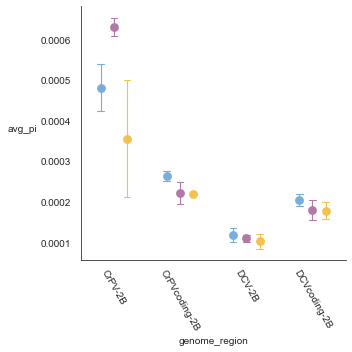

In [142]:
sns.set_style('white')


g = sns.catplot(df_pi_summary, 
                y='avg_pi',
                hue='GT', 
                x='genome_region', 
                order=['CrPV-2B', 'CrPVcoding-2B', 'DCV-2B', 'DCVcoding-2B'],
                palette=our_color_palette, 
                errorbar="se",
                linestyle='',
                errwidth=1.1, 
                dodge=0.4,
                capsize=0.1,
                legend =False, 
                kind='point')
# Add log scale to y-axis
#g.set(yscale="log")

# Improved Y-axis Ticks and Labels
#yticks = [1e-4,2e-4,3e-4,4e-4, 5e-4, 1e-3]  # Define your desired y-tick positions
#yticklabels = [1e-4,2e-4,3e-4,4e-4, 5e-4, 1e-3] # [r'$10^{-4}$', r'$5 \cdot 10^{-4}$', r'$10^{-3}$']  # Corresponding labels

#plt.yticks(yticks, yticklabels)
plt.ylabel('avg_pi', rotation=0, ha='right')  # Rotate y-axis label

# Explicitly enable and style y-axis ticks
ax = g.axes[0, 0]  # Access the axes object
ax.tick_params(axis='y', which='both', direction='out', length=6, color='black', width=1)  # Customize the ticks

# X-axis label rotation
g.set_xticklabels(rotation=-60)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

plt.show()

g.figure.savefig(f"/Users/lfuhrmann/Downloads/diversity_2B.pdf")

In [143]:
def f_genome_region(x):
    if x == 'CrPV-2B':
        return '2B'
    elif x == 'DCV-2B':
        return '2B'
    elif x == 'CrPVcoding-2B':
        return 'coding-2B'
    elif x == 'DCVcoding-2B':
        return 'coding-2B'

df_pi_summary['genome_region'] = df_pi_summary['genome_region'].apply(f_genome_region)

In [144]:
#df_pi_summary = df_pi_summary[['genome_region', 'virus', 'avg_pi', 'evo_line', 'genotype']]

In [145]:
import numpy as np
df_pi_summary['log_pi'] = np.log(df_pi_summary['avg_pi'])

In [146]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## take mean over passage

In [147]:
%%R -i df_pi_summary 

library(lme4)

df_pi_summary$virus <- as.factor(df_pi_summary$virus)
df_pi_summary$genome_region <- as.factor(df_pi_summary$genome_region)


model <- lmer(log_pi ~ virus * genome_region + (1|evo_line) + GT, data = df_pi_summary)

summary(model)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_pi ~ virus * genome_region + (1 | evo_line) + GT
   Data: df_pi_summary

REML criterion at convergence: 27.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6700 -0.4405  0.1464  0.4625  1.7434 

Random effects:
 Groups   Name        Variance Std.Dev.
 evo_line (Intercept) 0.005858 0.07654 
 Residual             0.069150 0.26296 
Number of obs: 36, groups:  evo_line, 18

Fixed effects:
                      Estimate Std. Error       df  t value Pr(>|t|)    
(Intercept)           -8.45143    0.04739 14.00000 -178.320  < 2e-16 ***
virus1                 0.41491    0.04739 14.00000    8.754 4.72e-07 ***
genome_region1         0.02976    0.04383 16.00000    0.679    0.507    
GT1                    0.08467    0.06703 14.00000    1.263    0.227    
GT2                    0.05963    0.06703 14.00000    0.890    0.389    
virus1:genome_region1  0.30053    0.04383 16.00000    6.85

/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


In [148]:
%%R

library(emmeans)
emmeans_result <- emmeans(model, specs = pairwise ~ virus * genome_region, adjust = "tukey")

In [149]:
%%R 

summary(emmeans_result$contrasts)

 contrast                           estimate    SE   df t.ratio p.value
 CrPV 2B - DCV 2B                      1.431 0.129 29.4  11.083  <.0001
 CrPV 2B - (CrPV coding-2B)            0.661 0.124 16.0   5.329  0.0004
 CrPV 2B - (DCV coding-2B)             0.889 0.129 29.4   6.889  <.0001
 DCV 2B - (CrPV coding-2B)            -0.770 0.129 29.4  -5.966  <.0001
 DCV 2B - (DCV coding-2B)             -0.542 0.124 16.0  -4.369  0.0024
 (CrPV coding-2B) - (DCV coding-2B)    0.229 0.129 29.4   1.772  0.3066

Results are averaged over the levels of: GT 
Degrees-of-freedom method: kenward-roger 
P value adjustment: tukey method for comparing a family of 4 estimates 


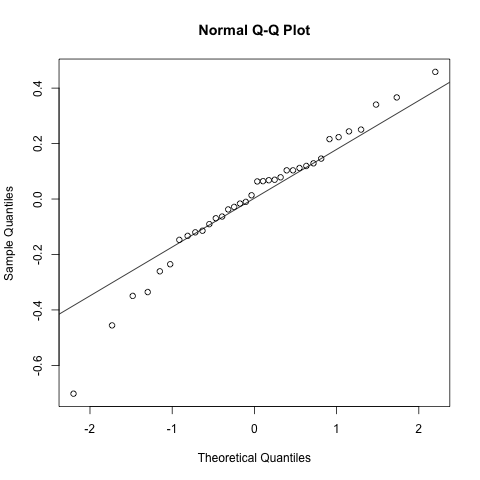

In [150]:
%%R 

qqnorm(resid(model))
qqline(resid(model))


In [151]:
%%R 

shapiro.test(resid(model))


	Shapiro-Wilk normality test

data:  resid(model)
W = 0.96516, p-value = 0.3084



In [152]:
%%R 

library(car)
leveneTest(resid(model) ~ virus * genome_region, data = df_pi_summary)


Levene's Test for Homogeneity of Variance (center = median)
      Df F value  Pr(>F)  
group  3  2.3396 0.09198 .
      32                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


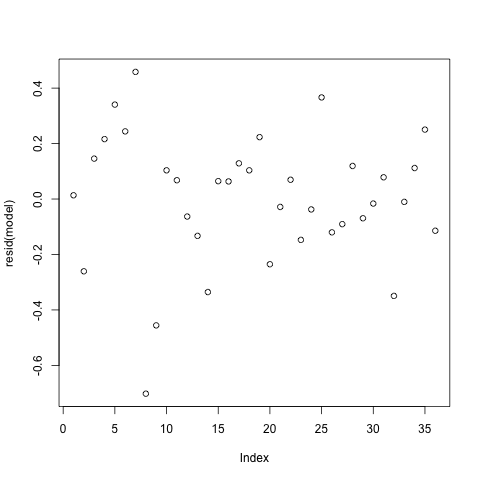

In [153]:
%%R

plot(resid(model))

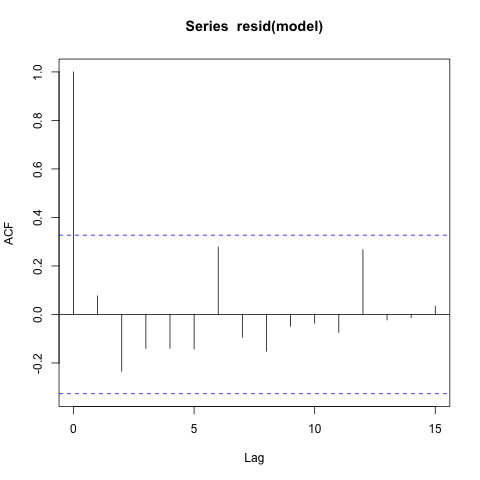

In [154]:
%%R

acf(resid(model))